# Introduction

This Jupyter notebook contains the `python` and `R` code for running the analysis in:

    Ahern, Christopher and Robin Clark. Conflict, Cheap Talk, and Jespersen's Cycle. 2016.

Here is some relevant system and version information. Using the `Anaconda` python distribution is highly recommended for installing and configuring the `SciPy` stack and other dependencies.

In [1]:
import IPython
import sys
import numpy as np
import scipy
print 'Python version: ', sys.version
print 'Platform: ', sys.platform
print
print 'IPython version: ', IPython.__version__
print 'NumPy version: ', np.__version__
print 'SciPy version: ', scipy.__version__

Python version:  2.7.11 |Anaconda 2.4.0 (x86_64)| (default, Dec  6 2015, 18:57:58) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Platform:  darwin

IPython version:  4.0.0
NumPy version:  1.10.4
SciPy version:  0.17.0


# 4. Equilibria

# Visualizing beta distributions

To get a sense for how *beta distributions* work we plot a few instances.

In [2]:
from scipy.stats import beta, uniform
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
hfont = {'fontname':'Times New Roman'}

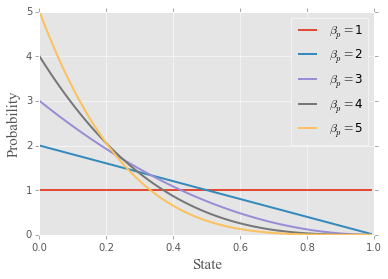

In [3]:
x = np.arange (0, 1, 0.01)

plt.style.use('ggplot')
for beta_var in range(1,6):
        y = beta.pdf(x,1,beta_var)
        plt.plot(x,y, label=r'$\beta_p = $' + str(beta_var), linewidth=2)
plt.legend(loc='upper right')
plt.ylabel("Probability", fontsize=15, **hfont)
plt.xlabel("State", fontsize=15, **hfont)
plt.savefig('../local/out/beta-distribution.pdf', format='pdf', dpi=1000)
plt.show()

To get a sense for the wide range of shapes, consider the following.

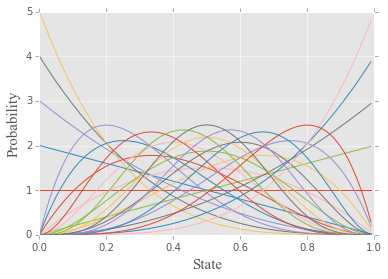

In [4]:
from scipy.stats import beta, uniform
import numpy as np
x = np.arange (0, 1, 0.01)

for alpha_var in range(1,6):
    for beta_var in range(1,6):
        y = beta.pdf(x,alpha_var,beta_var)
        plt.plot(x,y)
plt.ylabel("Probability", fontsize=15, **hfont)
plt.xlabel("State", fontsize=15, **hfont)
plt.show()

Change the variables below to get a sense for how individual values work.

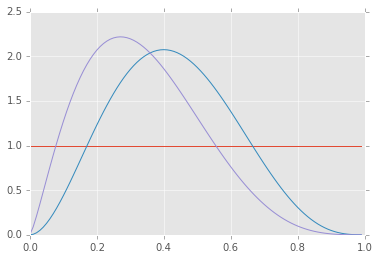

In [5]:
x = np.arange (0, 1, 0.01)
plt.style.use('ggplot')
y = beta.pdf(x, 1, 1)
plt.plot(x,y)
y = beta.pdf(x, 3, 4)
plt.plot(x,y)
y = beta.pdf(x, 2.3, 4.5)
plt.plot(x,y)
plt.show()

## Calculating evolutionarily stable strategies of the signaling game

Calculating the evolutionarily stables strategies of the signaling game requires defining the expected utilities of speakers and hearers, taking partial derivatives, and finding the values that maximize the expected utilities.

First, we import `sympy`, which is a library for symbolic math.

In [6]:
from sympy import *
from sympy.stats import Beta, density

Next, we define the symbols that we'll use in constructing the utility functions and the prior probability.

In [7]:
t, t_0, m_0, m_1, a_0, a_1, b = symbols('t t_0 m_0 m_1 a_0 a_1 b')
T = Beta("t", 1, 2)

Then, we build the actual utility functions and the respective expected utilities. Note that we can save a bit of effort by noting that the speaker's utility is defined by the hearer's response and the hearer's utility is the speaker's where $b=0$.

In [8]:
Utility_S_0 = 1 - (a_0 - t - (1-t)*b)**2
Utility_S_1 = 1 - (a_1 - t - (1-t)*b)**2
E_Utility_S = integrate(Utility_S_0*density(T)(t).evalf(), (t, 0, t_0)) + \
                integrate(Utility_S_1*density(T)(t).evalf(), (t, t_0, 1))
E_Utility_R = E_Utility_S.subs(b, 0)

Now, we can differentiate the utility functions by the actions available to speakers and hearers, and solve for the values of $t_0, a_0, a_1$ that maximize the expected utilities.

In [9]:
t0_sol = Eq(solve(diff(E_Utility_S, t_0), t_0)[0], t_0)
a0_sol = Eq(solve(diff(E_Utility_R, a_0), a_0)[0], a_0)
a1_sol = Eq(solve(diff(E_Utility_R, a_1), a_1)[0], a_1)

This can take a bit of time, so by default we've supplied the set of solutions to this system of equations. Note that there are two solutions because we haven't supplied the information to the solver that the values are constrained to be positive. In fact, we are only interested in the second solution that yields an ESS.

    ESS = solve([t0_sol, a0_sol, a1_sol], [t_0, a_0, a_1])

In [10]:
ESS = [((9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0), 0.333333333333333*(-3.0 + 2.0*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b - (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)), 0.333333333333333 + 0.666666666666667*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0)), ((9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0), 0.333333333333333*(-3.0 + 2.0*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b + (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)), 0.333333333333333 + 0.666666666666667*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))]

We can visualize this result in the following manner.

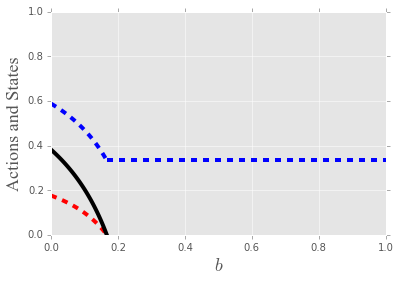

In [11]:
x = np.linspace(0,1/6.0, num=100)
plt.style.use('ggplot')
plt.plot(x, [ESS[1][1].subs(b, value).evalf() for value in x], 'r', linewidth=4, linestyle='--')
plt.plot(x, [ESS[1][2].subs(b, value).evalf() for value in x], 'b', linewidth=4, linestyle='--')
plt.plot(x, [ESS[1][0].subs(b, value).evalf() for value in x], 'k', linewidth=4)
plt.axhline(1/3.0, 1/6.0, 1, color='b', linewidth=4, ls='--')
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel(r"$b$", fontsize=18, **hfont)
plt.ylabel(r"Actions and States", fontsize=18, **hfont)
plt.savefig("../local/out/ESS-beta.pdf", format='pdf', dpi=1000, fontsize=18)
plt.show()

We can find the values of the variables for a given value of $b$. For example, for $b=0$, we can do the following.

In [12]:
[item.subs(b, 0).evalf() for item in ESS[1]]

[0.381966011250105, 0.175954681666807, 0.587977340833403]

Next, we can solve for the degree of speaker bias that will lead to the use of a single message. That is, if $b > \frac{1}{6}$, then only $ne...not$ will be used. Note that if you want to examine different prior distributions, you should examine `ESS` before solving to determine its structure.

In [13]:
solve(ESS[1][0], b)[0]

0.166666666666667

# 5. Dynamics

# Visualizing and formatting the data

We load the data into $R$, plot the data and output in a format that can be used to fit data to the functional cycle.

In [14]:
%load_ext rpy2.ipython

In [15]:
%%R
library(ggplot2, warn.conflicts=F, quietly=T)
library(dplyr, warn.conflicts=F, quietly=T)
library(extrafont)
library(reshape2, quietly=T)
neg.data.full = read.csv("../data/neg-data.csv", header=T)
neg.data.full = tbl_df(neg.data.full)

//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Stackoverflow is a great place to get help:
http://stackoverflow.com/tags/ggplot2.

  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Registering fonts with R

  res = super(Function, self).__call__(*new_args, **new_kwargs)


Here we filter out texts that are known to be outliers and exclude everything but sentential negation in declaratives.

In [16]:
%%R
# Filter out tokens without do-support label, year, or type
excluded.texts = c("CMORM","CMBOETH","CMNTEST","CMOTEST")
# CMBOETH : translation of Boethius' "Consolation of Philosophy", which is notably stilted
# CMORM   : Ormulum is very specific poetic format where adding an additional syllable for the meter is required
# CMOTEST, CMNTEST : Old and new testaments, which are known to carry archaisms longer than other texts
neg.data = neg.data.full %>% 
            filter(finite != "-") %>% # Exclude non-finite clauses
            filter(clausetype != "imperative") %>% # Exclude imperatives
            filter(exclude != "only") %>% # Exclude focus constructions
            filter(exclude != "constituent") %>% # Exclude constituent negation
            filter(exclude != "contraction") %>% # Exclude contraction
            filter(exclude != "coordination") %>% # Exclude coordinated clauses
            filter(exclude != "concord") %>% # Exclude cases of negative concord
            filter(exclude != "X") %>% # Exclude corpus errors
            filter(! author %in% excluded.texts) %>% # Exclude texts
            mutate(stages = ifelse(has.both, 2, ifelse(has.ne, 1, 3))) %>%
            select(year, author, stages)

We plot the data for all three variants over the course of Middle English.

In [17]:
%%R
#neg.data = neg.data.full %>% filter(! author %in% excluded.texts)
neg.plot.data =  neg.data %>% group_by(year, author) %>% 
    summarize(total=n(), ne=sum(stages==1, na.rm=TRUE)/total,
              not=sum(stages==3, na.rm=TRUE)/total,
              ne.not=sum(stages==2, na.rm=TRUE)/total)
neg.plot.data = melt(neg.plot.data, id=c("year", 'author', "total"))

ggplot(neg.plot.data, aes(x = year, y = value, color = variable)) +
  geom_point(aes(size = total), alpha = 0.5) +
  geom_smooth(method="loess", se = F, size=4) + # aes(weight = total), span=.6,
  scale_x_continuous(name="Year", limits=c(1100, 1500)) +
  scale_y_continuous(name="Proportion of forms", breaks=seq(0,1,.25)) +   scale_size_area("N", max_size = 20) +
  theme(text = element_text(size=20, family="Times New Roman"), legend.position="none") +  
  coord_cartesian(ylim = c(-.1,1.1)) #+ theme_hc()
ggsave('../local/out/neg-year-lines.pdf', height=6, width=8)

We also plot the data treating post-verbal tokens *as if* they were bipartite tokens in order to model the functional cycle.

In [18]:
%%R
# Compare ne to ne...not and not
first.data = neg.data %>% group_by(year) %>% mutate(value = as.integer(! stages==1)) %>% select(year, author, value)
first.plot.data = first.data %>% group_by(year, author) %>% 
    summarize(p = sum(value)/n(), total=n())
ggplot(aes(x = year, y = p), data = first.plot.data) +
  geom_point(aes(size = total), alpha = 0.5, position = "identity") +
  geom_smooth(method="loess", se = F, size=4) + 
  scale_x_continuous(name="Year", limits=c(1100, 1500)) +   
  scale_y_continuous(name="Proportion of forms", breaks=seq(0,1,.25)) +
  theme(text = element_text(size=20, family="Times New Roman")) + theme(legend.position="none") +
  scale_size_area("N", max_size = 20) +  coord_cartesian(xlim = c(1090,1540)) + coord_cartesian(ylim = c(-.1,1.1))
ggsave('../local/out/lump-plot1.pdf', height=6, width=8)

Finally, we output the data in a format that will make it easy to calculate a loss function in a vectorized manner.

In [19]:
%%R
functional.cycle.data = data.frame(year=rep(0, 401), has.tokens=rep(0,401), ones=rep(0, 401), zeros=rep(0, 401))
for (i in c(0:401)) {
    functional.cycle.data$year[i] = i + 1100 - 1
    functional.cycle.data$has.tokens[i] = nrow(first.data %>% filter(year == i + 1100 - 1)) > 0
    functional.cycle.data$ones[i] = nrow(first.data %>% filter(year == i + 1100 - 1, value == 1))
    functional.cycle.data$zeros[i] = nrow(first.data %>% filter(year == i + 1100 - 1, value == 0))
}
write.csv(functional.cycle.data, "../data/functional-cycle-data.csv", row.names=F)

# Defining the evolutionary game dynamics

Next, we define the discrete-time behavioral replicator dynamics outlined in Huttegger and Hofbauer (2015). The basic intuition is that we treat each state and each message *as if* it were its own population. This reduces calculating the dynamics to matrix multiplication.

We'll import several functions that we'll need.

In [20]:
from scipy.optimize import minimize
from scipy.special import beta as beta_func
from scipy.misc import comb
def beta_binomial(n, alpha, beta):
    return np.matrix([comb(n-1,k) * beta_func(k+alpha, n-1-k+beta) / beta_func(alpha,beta) for k in range(n)])

Next we define funtions that will be used to construct payoff matrices.

In [21]:
def U_S(state, action, b):
    return 1 - (action - state - (1-state)*b)**2
    #return 1 - abs(action - state - (1-state)*b)
def U_R(state, action):
    return 1 - (action - state)**2
# Define functions to map integers to interval [0,1]
def t(i, n):
    return i/float(n)
def a(i, n):
    return i/float(n)

Here we define the evolutionary game dynamics, which we can simulate for a given number of time steps given the starting state of the speaker populations $X$, the starting state of the hearer populations $Y$, their respective payoff matrices $A$ and $B$ and the prior probability over states.

In [22]:
def discrete_time_replicator_dynamics(n_steps, X, Y, A, B, P):
    """Calculate the discrete-time replicator dynamics for"""
    # Get the number of states, signals, and actions
    X_nrow = X.shape[0]
    X_ncol = X.shape[1]
    Y_nrow = Y.shape[0] # Same as X_ncol
    Y_ncol = Y.shape[1] # Often, but not necessarily, the same as X_nrow
    # Create empty arrays to hold the population states over time
    X_t = np.empty(shape=(n_steps, X_nrow*X_ncol), dtype=float)
    Y_t = np.empty(shape=(n_steps, X_nrow*X_ncol), dtype=float)
    # Set the initial state
    X_t[0,:] = X.ravel()
    Y_t[0,:] = Y.ravel()
    # Iterate forward over (n-1) steps
    for i in range(1,n_steps):
        # Get the previous state
        X_prev = X_t[i-1,:].reshape(X_nrow, X_ncol)
        Y_prev = Y_t[i-1,:].reshape(Y_nrow, Y_ncol)
        # Calculate the scaling factors
        E_X = A * Y_prev.T
        X_bar = (((A * Y_prev.T) * X_prev.T).diagonal()).T
        X_hat = E_X / X_bar
        # Calculate probability of states given messages
        C = np.divide(np.multiply(P.T, X_prev), (P * X_prev)[0])
        E_Y = (B.T * C).T
        Y_bar = ((E_Y*Y_prev.T).diagonal()).T
        Y_hat = np.divide(E_Y, Y_bar)
        # Calculate next states
        X_t[i,:] = np.multiply(X_prev, X_hat).ravel()
        Y_t[i,:] = np.multiply(Y_prev, Y_hat).ravel()
    return X_t, Y_t

This function simulates the evolutionary game dynamics defined above for a number of time steps for a given set of parameters.

In [23]:
def simulate_dynamics(n_steps, params):
    # Unpack the paramters
    a_s = params[0] # Sender initial state parameter
    b_p = params[1] # params[3]
    b = params[2] # params[4] # Sender bias parameter
    k = max(1, np.floor(params[3])) # int(params[5]) # Change this to alter scaling parameter
    # Construct initial states
    # Number of states and actions
    number = 100
    # Define prior probability
    prior = beta_binomial(number, 1, b_p)
    P = np.repeat(prior, 2, axis=0)
    # Define payoff matrices
    A =  np.matrix([[U_S(t(i, number-1), a(j,number-1), b) for j in range(number)] for i in range(number)])
    B = np.matrix([[U_R(t(i, number-1), a(j,number-1)) for j in range(number)] for i in range(number)])
    # Define sender population
    X0_m2 = beta_binomial(number, a_s, 1)
    X0_m1 = 1 - X0_m2
    X0 = np.vstack((X0_m1, X0_m2)).T
    # Calculate expected state given m2
    p_ti_m2 = np.multiply(X0[:,1], prior.T)
    p_m2 = prior * X0[:,1]
    p_t_m2 = p_ti_m2 / p_m2
    E_t_m2 = (np.array(range(number)) * p_t_m2) / number
    scale = E_t_m2[0,0]/(1 - E_t_m2[0,0])
    # Define receiver population
    Y0 = np.vstack((beta_binomial(number, (1/float(b_p)), 1), beta_binomial(number, scale, 1)))
    # Iterate through the discrete-time replicator dynamics
    X_sol, Y_sol = discrete_time_replicator_dynamics(n_steps*int(k), X0, Y0, A, B, P)
    return X_sol[0::k,:], Y_sol[0::k,:], prior

# Fitting the dynamic model to historical corpus data

Now that we can simulate the dynamics, we want to be able to fit them to the data. First, we define a loss function.

In [24]:
def calc_LL(p, df):
    return np.dot(np.log(p), df.ones) + np.dot(np.log(1 - p), df.zeros)

In [25]:
def loss_function(params, df):
    # Simulate the dynamics from 1100 to 1500
    X_sol, Y_sol, prior = simulate_dynamics(401, params)
    # Get p(m_2) over time
    m2_sol = np.asarray([prior.dot(line)[0,0] for line in X_sol[:,1::2]])
    # Calculate log likelihood given m2_sol
    LL = calc_LL(m2_sol, df)
    return -1*LL # Minimizing negative log-likelihood is equivalent to maximizing log-likelihood

Next, we import the data and define the function to be minimized with reference to that data.

In [26]:
import pandas as pd
func_data = pd.read_csv('../data/functional-cycle-data.csv')
from functools import partial
f = partial(loss_function, df=func_data)

Now we can minimize the loss function, which is equivalent to maximizing the likelihood of the parameters given the data.

In [27]:
%%time
fit = minimize(f, method="L-BFGS-B",
              x0=np.array([5, 10, 1/6.0, 1]),
              bounds=((1, 100), (1, 100), (0,1), (1,10)),
              options={"disp" : True})
print fit

      fun: 1684.3075865535016
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00127329, -0.00045475,  0.06127721,  0.        ])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 185
      nit: 27
   status: 0
  success: True
        x: array([  4.72836416,  13.7933177 ,   0.2704748 ,   1.        ])
CPU times: user 17.2 s, sys: 149 ms, total: 17.4 s
Wall time: 17.8 s


We save the result.

In [28]:
import pickle
with open('fit.pickle', 'wb') as handle:
    pickle.dump(fit, handle)

Now we plot the probability of the use of the incoming form over time as well as the information it carries about standards of precision over time.

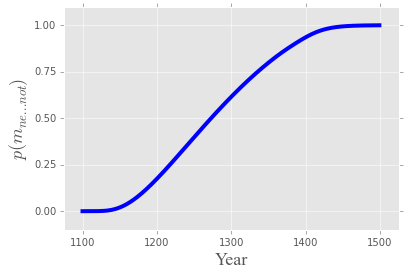

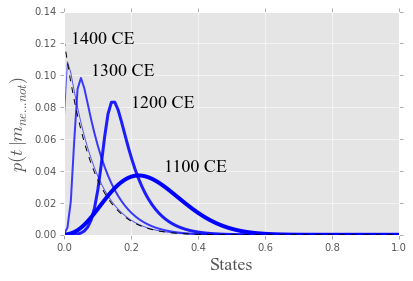

In [29]:
X_sol, Y_sol, prior = simulate_dynamics(400, fit.x)
states = np.linspace(0,1, num=100)
timesteps=400

m2_sol = [prior.dot(line)[0,0] for line in X_sol[:,1::2]]
years = [1100 + item for item in range(400)]
plt.plot(years, m2_sol, 'b', linewidth=4, zorder=3)
plt.ylim(-.1,1.1)
plt.xlim(1075, 1525)
plt.xlabel('Year', fontsize=18, **hfont)
plt.yticks(np.linspace(0, 1, num=5))
plt.ylabel(r'$p(m_{ne...not})$', fontsize=18)
plt.savefig("../local/out/p-m2.pdf", format='pdf', dpi=1000)
plt.show()    

for j, i in enumerate(range(0,timesteps, timesteps/4)):
    p_ti_m2 = np.multiply(X_sol[i,1::2], prior)
    p_m2 =  X_sol[i,1::2] * prior.T
    p_t_m2 = p_ti_m2 / p_m2
    plt.plot(states, p_t_m2.tolist()[0], color='b', linewidth=4-j, alpha=(1 - .5*(i/float(timesteps))))
plt.text(.3, .04, str(1100) + " CE", fontsize=18, **hfont)
plt.text(.2, .08, str(1200) + " CE", fontsize=18, **hfont)
plt.text(.08, .1, str(1300) + " CE", fontsize=18, **hfont)
plt.text(.02, .12, str(1400) + " CE", fontsize=18, **hfont)    
plt.plot(states, prior.tolist()[0], 'k--')
plt.ylabel(r'$p(t \mid m_{ne...not})$', fontsize=18)
plt.xlabel('States', fontsize=18, **hfont)
plt.savefig("../local/out/pt-m2.pdf", format='pdf', dpi=1000)
plt.show()

# Testing other ratios of time units

We can test other ratios of replicator dynamic time units to years. In particular, we fit he same model assuming that there are 1, 2, 3, 4, or 5 replicator dyanmic "generations" per year. If you want to fit this models, change the cell below to code and run it. Note that this code can take a couple of minutes to run depending on your machine. We have also included the resulting fits in the repository. These can be loaded below.

    import pickle
    fit_dict = {}
    for i in range(1,6):
        try:
            fit_dict[i] = minimize(f, method="L-BFGS-B",
                      x0=np.array([5, 10, 1/6.0, i]),
                      bounds=((1, 100), (1, 100), (0,1), (1,10)),
                      options={"maxiter" : 1000, "disp" : True})
        except:
            pass

    with open('fit_dict.pickle', 'wb') as handle:
        pickle.dump(fit_dict, handle)

In [30]:
fit_dict = pickle.load(open("fit_dict.pickle", "rb"))

We can examine the effect of changing this ratio of abstract "generations" per year. We find that one "generation" per year offers the best fit insofars as it minimizes negative log likelihood. Note that the model with four generations per year fails to converge. The estimated parameters across these models are similar, but appear to make tradeoffs. For example, $\hat{b}$ decreases whereas $\hat{\alpha}_s$ increases.

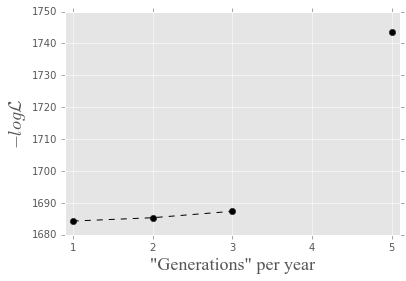

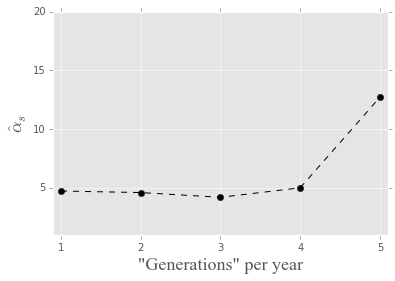

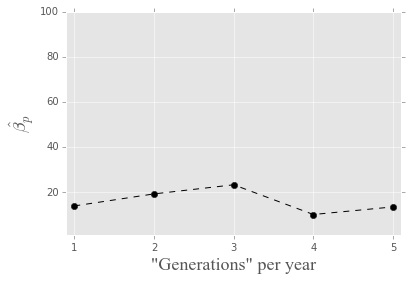

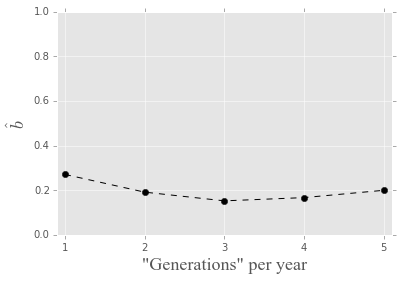

In [31]:
plt.plot(fit_dict.keys(), [item.fun for item in fit_dict.values()], 'ko--')
plt.xlabel('"Generations" per year', fontsize=18, **hfont)
plt.ylabel(r'$-log \mathcal{L}$', fontsize=18)
plt.xlim(.9, 5.1)
plt.show()
plt.plot(fit_dict.keys(), [item.x[0] for item in fit_dict.values()], 'ko--')
plt.xlabel('"Generations" per year', fontsize=18, **hfont)
plt.ylabel(r'$\hat{\alpha}_s$', fontsize=18)
plt.xlim(.9, 5.1)
plt.ylim(1, 20)
plt.show()
plt.plot(fit_dict.keys(), [item.x[1] for item in fit_dict.values()], 'ko--')
plt.xlabel('"Generations" per year', fontsize=18, **hfont)
plt.ylabel(r'$\hat{\beta_p}$', fontsize=18)
plt.xlim(.9, 5.1)
plt.ylim(1, 100)
plt.show()
plt.plot(fit_dict.keys(), [item.x[2] for item in fit_dict.values()], 'ko--')
plt.xlabel('"Generations" per year', fontsize=18, **hfont)
plt.ylabel(r'$\hat{b}$', fontsize=18)
plt.xlim(.9, 5.1)
plt.ylim(0,1)
plt.show()